Import csv file

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
h1 = pd.read_csv("H1.csv")

Filter and group by

In [2]:
is_cancelled = h1["IsCanceled"] == 1
cancelled_weeks = h1[is_cancelled].groupby(h1["ArrivalDateYear"].map(str) + h1["ArrivalDateWeekNumber"].map(str))
cancelled_series = cancelled_weeks.size()

In [3]:
cancelled_series

201527     41
201528     48
201529     87
201530     74
201531    101
         ... 
20175      51
20176      91
20177      96
20178     128
20179      77
Length: 115, dtype: int64

Time Series

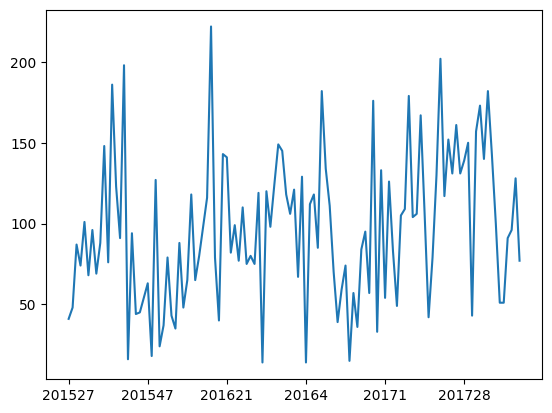

In [4]:
cancelled_series.plot()
plt.show()

Decomposition in trend, seasonal and residuals

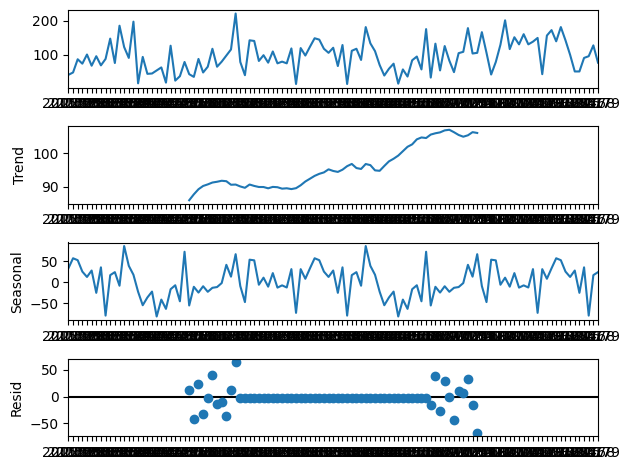

In [5]:
decomposition = seasonal_decompose(cancelled_series, model='additive', period=52)
decomposition.plot()
plt.show()

Autocorrelation and partial autocorrelation

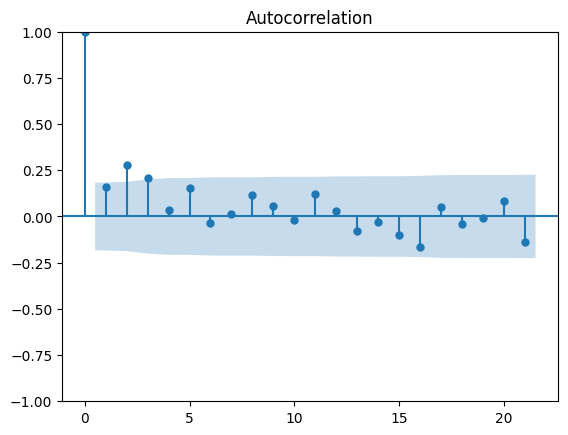

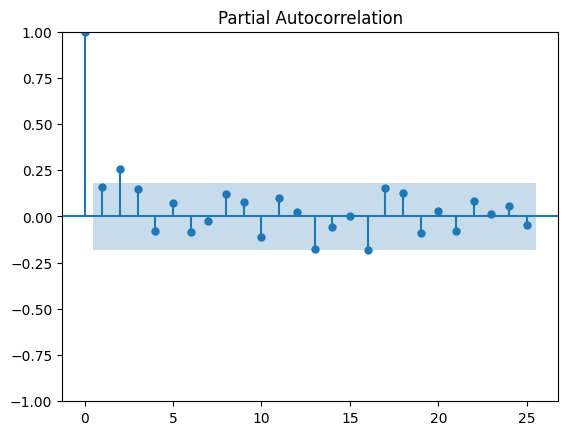

In [6]:
plot_acf(cancelled_series)
plot_pacf(cancelled_series, lags=25, method='ywm')
plt.show()

4-Period SMA

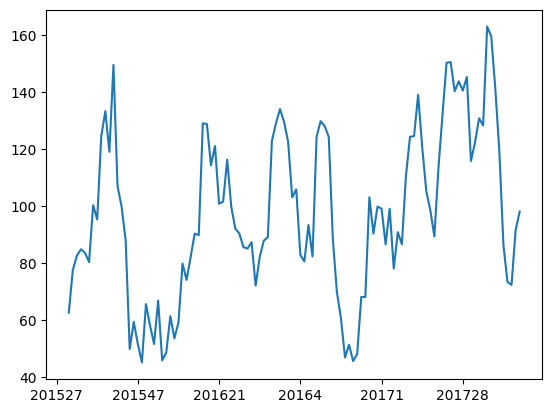

In [7]:
sma4 = cancelled_series.rolling(4).mean()
sma4.plot()
plt.show()

90/10 Train/Test Split

In [8]:
training = cancelled_series.head(math.ceil(0.9*len(cancelled_series)))
training

201527     41
201528     48
201529     87
201530     74
201531    101
         ... 
201727    131
201728    139
201729    150
20173      43
201730    157
Length: 104, dtype: int64

In [9]:
test = cancelled_series.tail(math.floor(0.1*len(cancelled_series)))
test

201731    173
201732    140
201733    182
201734    143
201735    100
20174      51
20175      51
20176      91
20177      96
20178     128
20179      77
dtype: int64